In [93]:
from pandas import Series, DataFrame
import pandas as pd
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)
df.columns.values

array(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET',
       'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE',
       'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION',
       'CRITICAL FLAG', 'SCORE', 'GRADE', 'GRADE DATE', 'RECORD DATE',
       'INSPECTION TYPE'], dtype=object)

## **Q1. Create a unique name for each restaurant.**

_Make a copy of the dataframe. Create a new column called 'RESTAURANT' by concetenating DBA, BUILDING, STREET, ZIPCODE_

In [7]:
df_copy = df.copy()
df_copy['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE']

In [8]:
df_copy['RESTAURANT'].head(10)

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

## **Q2. How many restaurants are included in the data?**

_use DataFrame.nunique() to find all unique values of RESTAURANT in our df copy, then count them. This should work because RESTAURANT should have a unique value for each separate restaurant (since it's a concatenation of the restaurant name and address)_

In [9]:
df_copy['RESTAURANT'].nunique()

10114

## **Q3. How many chains are there?**

_Make a column of unique addresses. Create a new dataframe with columns unique address and DBA, dropping duplicate values. Use a lambda expression to filter for restaurant names that appear in the new dataframe more than once, when it's grouped by DBA. Find the length of the filtered dataframe when grouped by DBA (I chose to make a value counts series in preparation for the next question)_

In [10]:
df_uniqueAddresses = df.copy()
df_uniqueAddresses['UNIQUE ADDRESS'] = df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE'] + ' ' + df['BORO']

In [11]:
df_uniqueAddresses['UNIQUE ADDRESS'].head(10)

0     469 FLATBUSH AVENUE 11225 BROOKLYN
1     469 FLATBUSH AVENUE 11225 BROOKLYN
2     469 FLATBUSH AVENUE 11225 BROOKLYN
3     469 FLATBUSH AVENUE 11225 BROOKLYN
4     469 FLATBUSH AVENUE 11225 BROOKLYN
5             97-22 63 ROAD 11374 QUEENS
6             97-22 63 ROAD 11374 QUEENS
7             97-22 63 ROAD 11374 QUEENS
8             97-22 63 ROAD 11374 QUEENS
9    8825 ASTORIA BOULEVARD 11369 QUEENS
Name: UNIQUE ADDRESS, dtype: object

In [63]:
df_restaurantLocs = df_uniqueAddresses[['UNIQUE ADDRESS', 'DBA']]
df_restaurantLocs = df_restaurantLocs.drop_duplicates()
df_restaurantLocs.head()

,UNIQUE ADDRESS,DBA
0,469 FLATBUSH AVENUE 11225 BROOKLYN,WENDY'S
5,97-22 63 ROAD 11374 QUEENS,TOV KOSHER KITCHEN
9,8825 ASTORIA BOULEVARD 11369 QUEENS,BRUNOS ON THE BOULEVARD
16,1269 SUTTER AVENUE 11208 BROOKLYN,MAY MAY KITCHEN
22,705 KINGS HIGHWAY 11223 BROOKLYN,SEUDA FOODS


In [76]:
df_chains = df_restaurantLocs.groupby('DBA').filter(lambda x: len(x) > 1)
chains_vc = df_chains['DBA'].value_counts() # prep for next question
chains_vc.head()

SUBWAY              144
MCDONALD'S           79
STARBUCKS COFFEE     74
DUNKIN' DONUTS       69
DUNKIN DONUTS        64
Name: DBA, dtype: int64

In [71]:
len(chains_vc)

368

## **Q4. Plot a bar graph of the top 20 most popular chains.**

_use our previously created value counts series to plot the graph._

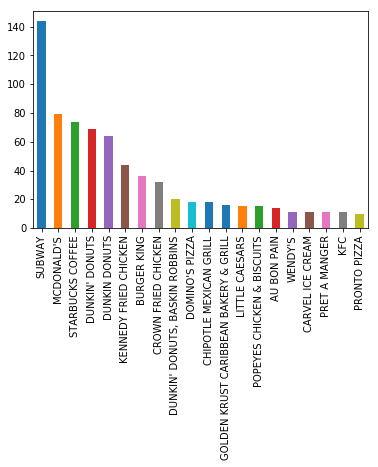

In [73]:
chains_vc[:20].plot(kind="bar")

## **Q5. What fraction of all restaurants are chains?**

_Use the value of all unique restaurants from Q2. Find the total number of chain restaurants by taking the length of the chains dataframe we made in Q3. Divide._

In [74]:
len(df_chains) / (df_copy['RESTAURANT'].nunique() * 1.0)      # make sure you use floats :(

0.16472216729286138

## **Q6. Plot the number of non-chain restaurants in each boro.**

_Make a new df that has unique addresses, dba, and boro. Mask to set 'missing' boro values to NaN, and get rid of those rows. Since a single restaurant can have more than 1 violation, make sure to drop duplicate rows. Group by DBA, and use a lambda function to filter for DBA values that appear only once. These are non-chains. Plot value counts of each boro._

C:\Users\jeile\Anaconda3\envs\chakra\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


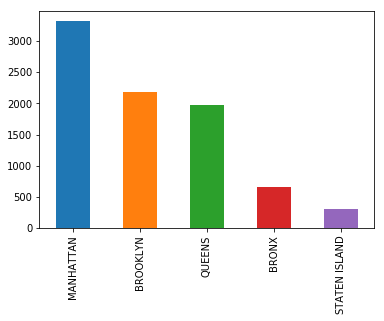

In [82]:
df = df_uniqueAddresses.copy()
df_withBoro = df[['UNIQUE ADDRESS', 'DBA', 'BORO']]
df_withBoro.loc[df_withBoro['BORO'] == 'Missing'] = np.nan
df_withBoro = df_withBoro.drop_duplicates()
boro_nonchain_vc = df_withBoro.groupby('DBA').filter(lambda x: len(x) == 1)['BORO'].value_counts()
boro_nonchain_vc.plot(kind='bar')

## **Q7. Plot the _fraction_ of non-chain restaurants in each boro.**

_Find the value counts of each boro in general by using the dataframe withBoro we made in our previous problem. Divide the value counts series for nonchainsn by this new value counts series, casting the result as a float for ease of plotting._

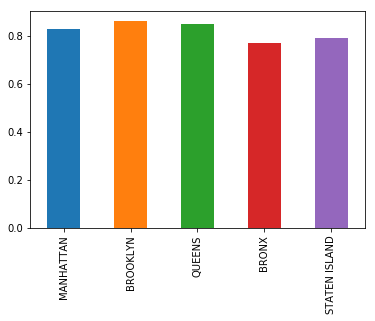

In [86]:
boro_vc = df_withBoro['BORO'].value_counts()
fraction_vc = (boro_nonchain_vc/boro_vc).astype(float)
fraction_vc.plot(kind='bar')

## **Q8. Plot the popularity of cuisines.**

_Makes a copy of the dataframe, only using the Restaurant and Cuisine Description columns. It then only allows unique restaurants, and counts the cuisine type of these restaurants, plotting the top 20 most popular cuisines._

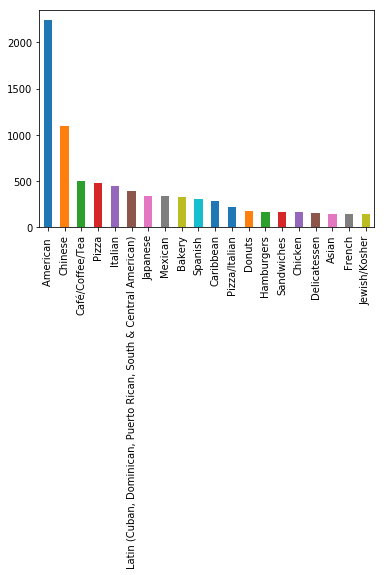

In [87]:
df_cuisine = df_copy[['RESTAURANT','CUISINE DESCRIPTION']]
df_nodup = df_cuisine.drop_duplicates(subset='RESTAURANT')
cuisine_count = df_nodup['CUISINE DESCRIPTION'].value_counts()
cuisine_count.sort_values()
cuisine_count[:20].plot(kind='bar')

## **Q9. Plot the cuisines among restaurants which do not get cited for violations.**

_Makes a copy of the dataframe, only using the Restaurant and Cuisine Description columns. Creates a mask that only allows instances where no violations occured (No violation code) and removes duplicate restaurants. It then counts the number of cuisines and plots the top 20 most frequent._

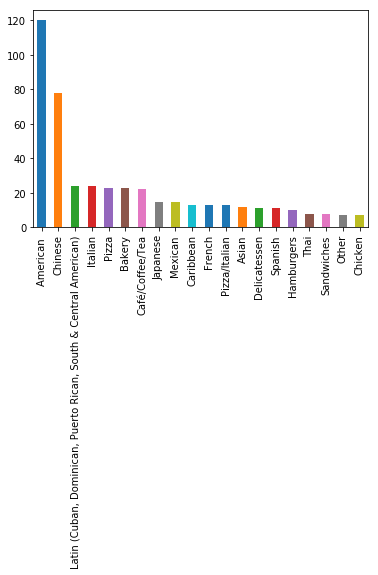

In [88]:
mask = (df_copy['VIOLATION CODE'].isnull())
df_violation = df_copy[mask][['RESTAURANT','CUISINE DESCRIPTION']]
df_violation = df_violation.drop_duplicates(subset='RESTAURANT', keep='first', inplace=False)
cuisine_count = df_violation['CUISINE DESCRIPTION'].value_counts()
cuisine_count.sort_values()
cuisine_count[:20].plot(kind='bar')

## **Q10. What cuisines tend to be the “cleanest”?**

_make new dataframe with unique restaurant name, cuisine descriptions, and violation codes. set the index to restaurant, find the total number of restaurants with a certain cuisine and how many of those have violations. divide the two to find cuisines with the lowest ratios of violations._

In [94]:
orig_data = pd.read_csv('NYC_Restaurants.csv',
                        parse_dates=['INSPECTION DATE'])
new_df = orig_data[['DBA','BUILDING','STREET','ZIPCODE','CUISINE DESCRIPTION','VIOLATION CODE']]
df2 = new_df.copy()
df2['Restaurant'] = new_df['DBA'] + ' ' + new_df['BUILDING'] + ' ' + new_df['STREET'].apply(str) + ' ' + new_df['ZIPCODE'].apply(str)
df2['Cuisine'] = new_df['CUISINE DESCRIPTION']
rest_cuisine_v_df = df2[['Restaurant','Cuisine','VIOLATION CODE']]
rest_cuisine_v_df = rest_cuisine_v_df.set_index('Restaurant')
cuisine_vc = rest_cuisine_v_df['Cuisine'].value_counts()
cuisine_20plus = cuisine_vc[cuisine_vc >= 20]

nullmask = rest_cuisine_v_df['VIOLATION CODE'].isnull()
cuisine_pass = rest_cuisine_v_df[nullmask]
cuisine_pass_vc = cuisine_pass['Cuisine'].value_counts()
cuisine_ratio = pd.concat([cuisine_pass_vc,cuisine_20plus],axis = 1,keys = ['Pass','Serving'])
i = 0
top_list_index = []
top_list_values = []
for row in cuisine_ratio.itertuples():
    if not math.isnan(row[1]) and not math.isnan(row[2]):
        top_list_index.append(row[0])
        top_list_values.append(row[1]/row[2])

t1 = Series(top_list_index)
t2 = Series(top_list_values)
df_ratios = pd.concat([t1,t2],axis = 1,keys = ['Cuisine', 'Ratio of No Violations'])
df_ratios = df_ratios.set_index('Cuisine')
df_ratios = df_ratios.sort_values(by = 'Ratio of No Violations',ascending = False)

top_ten_clean = df_ratios[:10]
top_ten_clean

,Ratio of No Violations
Cuisine,
Creole,0.040000
Chinese/Cuban,0.036364
Barbecue,0.031250
Soups & Sandwiches,0.030769
Continental,0.028986
Other,0.025547
Peruvian,0.023256
Russian,0.022857
French,0.021667


## **Q11. What are the most common violations in each borough?**

_Calculated the counts of each violation-boro combination by creating a dummy column with a value of 1 and collapsing it through a pivot table_

In [89]:
df_counts = DataFrame(copy(df), columns = df.columns.values)
df_counts['count'] = Series(repeat(1,len(df_counts)))

pivoted = pd.pivot_table(df_counts, index = 'BORO', columns = 'VIOLATION CODE', values='count', aggfunc=sum)
pivoted = pivoted.fillna(0)
pivoted = pivoted.drop('Missing')

pivoted.T.idxmax()

BORO
BRONX            10F
BROOKLYN         10F
MANHATTAN        10F
QUEENS           10F
STATEN ISLAND    10F
dtype: object

## **Q12. What are the most common violations per borough, after normalizing for the relative abundance of each violation?**

_Normalized the entire pivot table DataFrame by constructing a function that divides each violation count within a bourough by the total count for that violation. Returns the new pivot table._

In [91]:
def violationFrequency(df):
    pivot = pd.pivot_table(df_counts, index = "VIOLATION CODE", values = 'count', aggfunc=sum)
    pivot = pivot.T
    
    for i in df.columns.values:
        f = pivot[i]
        df[i] /= float(f)
    
    return df

In [92]:
violationFrequency(pivoted)
pivoted.T.idxmax()

BORO
BRONX            04I
BROOKLYN         02D
MANHATTAN        03E
QUEENS           03G
STATEN ISLAND    03C
dtype: object